# Load tools

In [1]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [2]:
#%pip install gseapy
#%pip install numpy
#%pip install pydot graphviz
#%pip install matplotlib
#%pip install plotnine
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install networkx

In [201]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pydot
import gseapy
import networkx as nx
import gseapy
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from gseapy import biomart
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Load DESeq2 results

In [235]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/*res*txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=\" \")\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt', '/Users/patrickmurphy/Documents/UC

In [236]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InvivoCarotid_Lig_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt", sep=" ")
InVitroMsBrEC_TNF_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt", sep=" ")
InVitroHuHBEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVivoMsBrEC_GrnKI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt", sep=" ")
InvivoCarotid_Contra_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Inner_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Outer_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")

In [237]:
#Invert sign of carotid data (they are run with WT v KO)

# Columns to invert
columns_to_invert = ['log2FoldChange', 'stat']  # Add other column names as needed

# Inverting the sign
InvivoCarotid_Lig_WTvKO_res[columns_to_invert] = InvivoCarotid_Lig_WTvKO_res[columns_to_invert] * -1
InvivoCarotid_Contra_WTvKO_res[columns_to_invert] = InvivoCarotid_Contra_WTvKO_res[columns_to_invert] * -1

# Load data for base mean (filtering for GSEA)

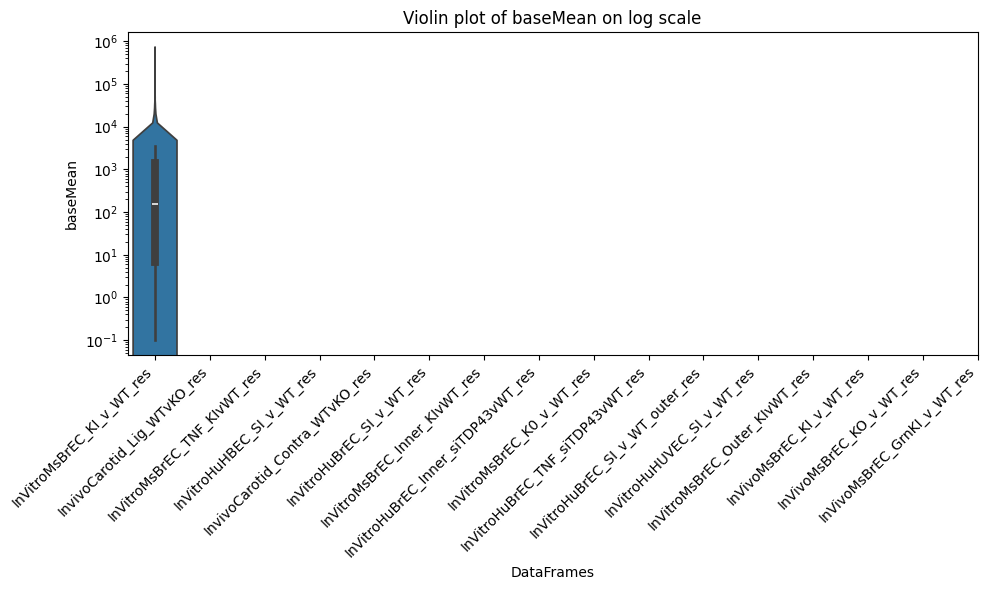

In [238]:
# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# Extracting baseMean from each DataFrame and replacing 0 with a small number (0.1)
data = [df['baseMean'].replace(0, pd.NA).dropna().apply(lambda x: max(x, 0.1)) for df in df_dict.values()]

# Plotting the violin plot with a log scale
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
plt.yscale('log')
plt.title('Violin plot of baseMean on log scale')
plt.xlabel('DataFrames')
plt.ylabel('baseMean')

# Setting x-axis labels using the keys of the dictionary (DataFrame names)
plt.xticks(ticks=range(len(df_dict)), labels=df_dict.keys(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Create RNK files for GSEA

In [239]:
#Create RNK files for GSEA from DESeq2 data

# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows where baseMean >= 5
    df = df[df['baseMean'] >= 5]

    # If you want to ensure there is data after filtering you can add a check:
    if df.empty:
        print(f"No data in DataFrame {name} with baseMean >= 5")
        continue

    # Selecting only the 'log2FoldChange' column
    new_df = df[['log2FoldChange']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='log2FoldChange', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('_res', '_Log2FC')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [240]:
InVivoMsBrEC_GrnKI_v_WT_Log2FC

,
Strip2,23.057556
Vcan,22.643121
A2m,22.139591
Gprin3,22.035717
Mael,21.601154
...,...
Lrrn4cl,-9.978228
Gm43511,-10.420898
Ifi209,-23.631721
Fndc1,-23.644568


In [241]:
#Create RNK files for DESeq2 from single nuclei analysis

# Original DataFrame names and objects
df_dict = {
    'InVivoNuclei_Clust1v3_res': InVivoNuclei_Clust1v3_res
}

new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Set '1_names' as the index
    df = df.set_index('1_names')
    
    # Selecting only the columns that contain 'logfoldchanges'
    selected_columns = [col for col in df.columns if 'logfoldchanges' in col.lower()]
    new_df = df[selected_columns]
    
    # If selected_columns is not empty, proceed to sort and other operations
    if selected_columns:
        # Sorting the values based on the selected column in descending order
        new_df = new_df.sort_values(by=selected_columns[0], ascending=False)
        
        # Assigning no column names
        new_df.columns = ['']
        
        # Creating the new name by replacing 'res' with 'Log2FC' in the original name
        new_name = name.replace('_res', '_Log2FC')
        
        # Adding the new DataFrame to the new_df_dict dictionary with the new name
        new_df_dict[new_name] = new_df
    
# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

# Get GSEA Public Datasets

In [242]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "KEGG" in name]

# Display the first 10
print(filt_names[:10])

['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


In [243]:
from biomart import BiomartServer

# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 112'] Fetching datasets
[BiomartDatabase:'Mouse strains 112'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 112'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 112'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 112'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [244]:
# Choose the dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'mmusculus_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
h2m_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        human_gene, mouse_homolog = row
        h2m_dict[human_gene] = mouse_homolog

[BiomartDataset:'hsapiens_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'mmusculus_homolog_associated_gene_name']}
[BiomartDataset:'hsapiens_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="hsapiens_gene_ensembl" interface="default"><Attribute name="external_gene_name" /><Attribute name="mmusculus_homolog_associated_gene_name" /></Dataset></Query>'


# Convert RNK files from mouse to human (and human to mouse)

In [245]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InvivoCarotid_Lig_WTvKO_Log2FC': InvivoCarotid_Lig_WTvKO_Log2FC,
    'InVitroMsBrEC_TNF_KIvWT_Log2FC': InVitroMsBrEC_TNF_KIvWT_Log2FC,
    'InvivoCarotid_Contra_WTvKO_Log2FC': InvivoCarotid_Contra_WTvKO_Log2FC,
    'InVitroMsBrEC_Inner_KIvWT_Log2FC': InVitroMsBrEC_Inner_KIvWT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVitroMsBrEC_Outer_KIvWT_Log2FC': InVitroMsBrEC_Outer_KIvWT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
    'InVivoMsBrEC_GrnKI_v_WT_Log2FC': InVivoMsBrEC_GrnKI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [246]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroHuHBEC_SI_v_WT_Log2FC': InVitroHuHBEC_SI_v_WT_Log2FC,
    'InVitroHuBrEC_SI_v_WT_Log2FC': InVitroHuBrEC_SI_v_WT_Log2FC,
    'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC': InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC': InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_SI_v_WT_outer_Log2FC': InVitroHuBrEC_SI_v_WT_outer_Log2FC,
    'InVitroHuHUVEC_SI_v_WT_Log2FC': InVitroHuHUVEC_SI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Mouse_GeneID'] = df['GeneID'].map(h2m_dict)
    df.set_index('Mouse_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"
    globals()[new_var_name] = transformed_df

# Get GSEA Custom datasets (and convert mouse to human, and human to mouse)

In [247]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_human = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsHum2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_human, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_human = pd.read_csv(file_path_human, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_human_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_human_genesets[column] = df_human[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [248]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_mouse = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsMus2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_mouse, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_mouse = pd.read_csv(file_path_mouse, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_mus_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_genesets[column] = df_mouse[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [249]:
df_human

,PMID34755601_bCatenin_BrainEC_Up,PMID34755601_bCatenin_p3_iPSC_Up,PMID34755601_bCatenin_p1_iPSC_Up,PMID34755601_Cultured_BrECs_bCatenin_Down,PMID34755601_bCatenin_p3_iPSC_Down,PMID34755601_bCatenin_p1_iPSC_Down,GSE25145_ErkOE_HUVEC_Up,GSE25145_ErkOE_HUVEC_Down,PMID16341264_KLF2OE_HUVEC_Up,PMID16341264_KLF2OE_HUVEC_Down,PMID38168276_Dementia_BrainEC_Up,PMID38168276_Dementia_BrainEC_Down
0,ABCC6,APCDD1,PRND,S100A10,COL1A1,IL1RL1,IGFBP5,FST,TRH,IL8,NEAT1,SLCO1A2
1,SLCO1C1,DKK2,APLNR,MEST,COL1A2,CHPF,CMKLR1,OTOF,CRABP2,RGC32,ST6GALNAC3,SPOCK3
2,SOBP,LPL,NTS,DPYSL3,THY1,LOX,DARC,ARHGEF4,C11orf9,ANGPT2,PIK3R3,ABLIM1
3,FGFBP1,PCSK2,APCDD1,GYPC,IGFBP5,WISP1,ADAMTS1,RASSF2,HBA2,FABP4,SLCO4A1,ABCG2
4,CAMK2B,LSR,CCL2,EFEMP2,MME,TMEM100,KLK10,PDE3A,CKB,SELE,FKBP5,PLPPR4
...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FUT4,NDRG1,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STK38L,PRKCZ,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EEF1A2,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLDA2,NaN,NaN,NaN


In [250]:
df_mouse

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up
0,Angpt2,Serpina1b,Cxcl3,Gm22245,Raet1b,Esr1
1,Cd177,Klk10,Slc26a9,Kcnd3os,Crhbp,Grin2a
2,Kit,Cidea,Tmem212,4732463B04Rik,BC018473,Cdkn2a
3,Cd300lf,Cox8b,Gm15340,Cyp1a1,Gm6654,Fosb
4,Il1b,Cyp2b10,Gkn1,Ces1e,Lars2,Gm4841
...,...,...,...,...,...,...
197,Cd68,Plin4,Shroom2,Anxa8,Bmp2,Aim2
198,NaN,NaN,Oacyl,Gm21747,NaN,Slc35f1
199,NaN,NaN,Ccnf,NaN,NaN,NaN
200,NaN,NaN,Hist1h2bk,NaN,NaN,NaN


In [251]:
#Convert mouse gene id to human

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_mouse, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_mouse.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Apply the transformation
transformed_df = transform_dataframe(df_mouse, m2h_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_mouse_HsGeneID = transformed_df


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_70958/3619832323.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [252]:
#Convert human gene id to mouse

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_human, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_human.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Example usage
# Assuming df_human is your DataFrame with human gene IDs
# And h2m_dict is your mapping dictionary from human to mouse gene IDs
transformed_df = transform_dataframe(df_human, h2m_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_human_MmGeneID = transformed_df

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_70958/2397311147.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [253]:
df_mouse_HsGeneID

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A
2,KIT,CIDEA,TMEM212,,,
3,CD300LF,,,CYP1A1,,FOSB
4,IL1B,,GKN1,,LARS2,
...,...,...,...,...,...,...
197,,PLIN4,SHROOM2,ANXA8L1,BMP2,AIM2
198,NaN,NaN,,Gm21747,NaN,SLC35F1
199,NaN,NaN,CCNF,NaN,NaN,NaN
200,NaN,NaN,Hist1h2bk,NaN,NaN,NaN


In [254]:
df_human_MmGeneID

,PMID34755601_bCatenin_BrainEC_Up,PMID34755601_bCatenin_p3_iPSC_Up,PMID34755601_bCatenin_p1_iPSC_Up,PMID34755601_Cultured_BrECs_bCatenin_Down,PMID34755601_bCatenin_p3_iPSC_Down,PMID34755601_bCatenin_p1_iPSC_Down,GSE25145_ErkOE_HUVEC_Up,GSE25145_ErkOE_HUVEC_Down,PMID16341264_KLF2OE_HUVEC_Up,PMID16341264_KLF2OE_HUVEC_Down,PMID38168276_Dementia_BrainEC_Up,PMID38168276_Dementia_BrainEC_Down
0,Abcc6,Apcdd1,Prnd,S100a10,Col1a1,Il1rl1,Igfbp5,Fst,Trh,IL8,,Slco1a4
1,Slco1c1,Dkk2,Aplnr,Mest,Col1a2,Chpf,Cmklr1,Otof,Crabp2,RGC32,St6galnac3,Spock3
2,Sobp,Lpl,Nts,Dpysl3,Thy1,Lox,DARC,,C11orf9,Angpt2,Pik3r3,Ablim1
3,Fgfbp1,Pcsk2,Apcdd1,Gypc,Igfbp5,WISP1,Adamts1,Rassf2,Hba-a2,Fabp4,Slco4a1,Abcg3
4,Camk2b,Lsr,,Efemp2,Mme,Tmem100,Klk10,Pde3a,Ckb,Sele,Fkbp5,Plppr4
...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fut4,Ndrg1,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stk38l,Prkcz,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eef1a2,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Phlda2,NaN,NaN,NaN


In [255]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

df_mouse_HsGeneID

,PMID29293084_LowFlowResponse_Up,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID28239661_KLF2KLF4_deletion_Down,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up
0,ANGPT2,SERPINA1,CXCL3,RNU6-1305P,Raet1b,ESR1
1,CD177,KLK10,SLC26A9,,CRHBP,GRIN2A
2,KIT,CIDEA,TMEM212,,,
3,CD300LF,,,CYP1A1,,FOSB
4,IL1B,,GKN1,,LARS2,
...,...,...,...,...,...,...
197,,PLIN4,SHROOM2,ANXA8L1,BMP2,AIM2
198,NaN,NaN,,Gm21747,NaN,SLC35F1
199,NaN,NaN,CCNF,NaN,NaN,NaN
200,NaN,NaN,Hist1h2bk,NaN,NaN,NaN


In [256]:
#Remove NaN

# Initialize an empty dictionary
custom_endo_mus_HsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse_HsGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_HsID_genesets[column] = df_mouse_HsGeneID[column].dropna().tolist()

    
    
# Initialize an empty dictionary
custom_endo_hum_MsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human_MmGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_hum_MsID_genesets[column] = df_human_MmGeneID[column].dropna().tolist()



# Convert DEseq2 results from mouse to human (_res_HsGeneID)

In [257]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
#    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
#    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
#    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
#    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
#    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

def transform_dataframe(df, m2h_dict):
    old_index = df.index
    new_index = old_index.map(m2h_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [258]:
InVitroMsBrEC_KI_v_WT_res_HsGeneID

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
NaN,3.179151,0.813513,0.596352,1.364149,0.172521,0.999194
NaN,0.317445,0.774325,2.147881,0.360506,0.718468,0.999194
NaN,921.291126,-0.038530,0.166296,-0.231694,0.816776,0.999194
NaN,34.786652,-0.590343,0.770232,-0.766448,0.443410,0.999194
NaN,41.353547,-0.241785,0.340506,-0.710076,0.477657,0.999194
...,...,...,...,...,...,...
ZYG11A,0.158409,-0.991949,3.059679,-0.324200,0.745786,0.999194
ZYG11B,1220.481218,-0.013288,0.154834,-0.085824,0.931606,0.999194
ZYX,9752.166948,-0.045955,0.149852,-0.306673,0.759092,0.999194
ZZEF1,3270.052145,0.149254,0.123193,1.211542,0.225688,0.999194


# Convert DEseq2 results from mouse to human (_res_MsGeneID)

In [259]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
#    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
#    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
#    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
#    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
#    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
#    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
#    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
#    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

def transform_dataframe(df, h2m_dict):
    old_index = df.index
    new_index = old_index.map(h2m_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [260]:
InVitroHuBrEC_TNF_siTDP43vWT_res_MsGeneID

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1bg,9.247981,0.466951,1.074602,0.434534,0.663901,0.99988
NaN,31.180199,0.471104,0.716100,0.657875,0.510619,0.99988
A1cf,0.000000,NaN,NaN,NaN,NaN,NaN
A2m,17.392478,-2.521762,1.244434,-2.026433,0.042720,0.99988
NaN,1.938522,-4.409795,2.868243,-1.537455,0.124182,0.99988
...,...,...,...,...,...,...
,0.000000,NaN,NaN,NaN,NaN,NaN
Zyg11b,1684.265983,-0.299214,0.242950,-1.231590,0.218102,0.99988
Zyx,16075.265103,-0.014190,0.248341,-0.057140,0.954434,0.99988
,0.000000,NaN,NaN,NaN,NaN,NaN


# Run GSEA (three searches, for Public, Custom Mouse and Custom Human Sets)

In [261]:
import gseapy

# List available gene set libraries
libraries = gseapy.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [262]:
#Convert KEGG and Hallmark to mouse IDs

#read gmt file into dict
KEGG_2023_Human = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/c2.cp.kegg_legacy.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
KEGG_2023_Human_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in KEGG_2023_Human.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    KEGG_2023_Human_Ms[set_name] = mouse_genes
    
    

#read gmt file into dict
MSigDB_Hallmark_2023 = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/h.all.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
MSigDB_Hallmark_2023_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in MSigDB_Hallmark_2023.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    MSigDB_Hallmark_2023_Ms[set_name] = mouse_genes

In [263]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_mus_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom'] = results

2024-06-14 15:09:33,252 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-14 15:09:33,287 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-06-14 15:09:33,312 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-14 15:09:33,313 [INFO] Parsing data files for GSEA.............................
2024-06-14 15:09:33,314 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-14 15:09:33,315 [INFO] 0006 gene_sets used for further statistical testing.....
2024-06-14 15:09:33,315 [INFO] Start to run GSEA...Might take a while..................
2024-06-14 15:09:33,799 [INFO] Congratulations. GSEApy runs successfully................

2024-06-14 15:09:33,811 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-0

In [264]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_hum_MsID_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom2'] = results

2024-06-14 15:09:41,628 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-14 15:09:41,651 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-06-14 15:09:41,667 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-14 15:09:41,667 [INFO] Parsing data files for GSEA.............................
2024-06-14 15:09:41,669 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-14 15:09:41,669 [INFO] 0012 gene_sets used for further statistical testing.....
2024-06-14 15:09:41,669 [INFO] Start to run GSEA...Might take a while..................
2024-06-14 15:09:42,126 [INFO] Congratulations. GSEApy runs successfully................

2024-06-14 15:09:42,134 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-0

In [265]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=MSigDB_Hallmark_2023_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_hallmark'] = results

2024-06-14 15:09:51,544 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-14 15:09:51,567 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-06-14 15:09:51,583 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-14 15:09:51,584 [INFO] Parsing data files for GSEA.............................
2024-06-14 15:09:51,585 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-14 15:09:51,586 [INFO] 0050 gene_sets used for further statistical testing.....
2024-06-14 15:09:51,586 [INFO] Start to run GSEA...Might take a while..................
2024-06-14 15:09:52,637 [INFO] Congratulations. GSEApy runs successfully................

2024-06-14 15:09:52,654 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-0

In [266]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=KEGG_2023_Human_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_kegg'] = results

2024-06-14 15:10:12,371 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-06-14 15:10:12,391 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-06-14 15:10:12,408 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-14 15:10:12,408 [INFO] Parsing data files for GSEA.............................
2024-06-14 15:10:12,411 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-06-14 15:10:12,412 [INFO] 0183 gene_sets used for further statistical testing.....
2024-06-14 15:10:12,412 [INFO] Start to run GSEA...Might take a while..................
2024-06-14 15:10:14,743 [INFO] Congratulations. GSEApy runs successfully................

2024-06-14 15:10:14,785 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-0

# Merge GSEA results (and Cat into a single saved csv file)

In [306]:
gsea_result_kegg = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg,
#    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_kegg,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1 
}

# The result dataframe
merged_GSEA_df_kegg = None

for df_name, gsea_res in gsea_result_kegg.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_kegg is None:
        merged_GSEA_df_kegg = df
    else:
        merged_GSEA_df_kegg = pd.merge(merged_GSEA_df_kegg, df, on='Term', how='outer')

In [307]:
gsea_result_hallmark = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
#    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_hallmark,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_hallmark 
}

# The result dataframe
merged_GSEA_df_hallmark = None

for df_name, gsea_res in gsea_result_hallmark.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_hallmark is None:
        merged_GSEA_df_hallmark = df
    else:
        merged_GSEA_df_hallmark = pd.merge(merged_GSEA_df_hallmark, df, on='Term', how='outer')

In [308]:
gsea_result_custom = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom,
#    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom 
}

merged_GSEA_df_custom = None

for df_name, gsea_res in gsea_result_custom.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom is None:
        merged_GSEA_df_custom = df
    else:
        merged_GSEA_df_custom = pd.merge(merged_GSEA_df_custom, df, on='Term', how='outer')

In [309]:
gsea_result_custom2 = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2,
#    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom2,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom2
}

merged_GSEA_df_custom2 = None

for df_name, gsea_res in gsea_result_custom2.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom2 is None:
        merged_GSEA_df_custom2 = df
    else:
        merged_GSEA_df_custom2 = pd.merge(merged_GSEA_df_custom2, df, on='Term', how='outer')

In [310]:
merged_GSEA_df_custom2

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVitroHuBrEC_SI_v_WT,NOM p-val_InVitroHuBrEC_SI_v_WT,FDR q-val_InVitroHuBrEC_SI_v_WT,FWER p-val_InVitroHuBrEC_SI_v_WT,NES_InVitroHuBrEC_InnerFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,NES_InVitroHuBrEC_TNF_SI_v_WT,NOM p-val_InVitroHuBrEC_TNF_SI_v_WT,FDR q-val_InVitroHuBrEC_TNF_SI_v_WT,FWER p-val_InVitroHuBrEC_TNF_SI_v_WT,NES_InVitroHuBrEC_OuterFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,NES_InVitroHuHUVEC_SI_v_WT,NOM p-val_InVitroHuHUVEC_SI_v_WT,FDR q-val_InVitroHuHUVEC_SI_v_WT,FWER p-val_InVitroHuHUVEC_SI_v_WT,NES_InVitroMsBrEC_K0_v_WT,NOM p-val_InVitroMsBrEC_K0_v_WT,FDR q-val_InVitroMsBrEC_K0_v_WT,FWER p-val_InVitroMsBrEC_K0_v_WT,NES_InVivoMsBrEC_KI_v_WT,NOM p-val_InVivoMsBrEC_KI_v_WT,FDR q-val_InVivoMsBrEC_KI_v_WT,FWER p-val_InVivoMsBrEC_KI_v_WT,NES_InVivoMsBrEC_K0_v_WT,NOM p-val_InVivoMsBrEC_K0_v_WT,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT
0,GSE25145_ErkOE_HUVEC_Down,-1.077779,0.278333,0.672107,0.871,-1.293048,0.084926,0.104963,0.613,-1.04124,0.396355,0.440229,0.99,-1.22894,0.123596,0.216971,0.714,1.123795,0.218341,0.208848,0.467,-1.84594,0.0,0.0,0.0,-1.488516,0.005736,0.016084,0.055,-0.880915,0.703576,1.0,1.0,-0.89064,0.6875,0.944721,0.994
1,GSE25145_ErkOE_HUVEC_Up,-1.305749,0.049645,0.271703,0.347,-2.095941,0.0,0.0,0.0,-2.301706,0.0,0.0,0.0,-1.409044,0.031407,0.069059,0.236,-2.435473,0.0,0.0,0.0,-1.324551,0.063146,0.074221,0.459,-1.289501,0.060491,0.084319,0.34,1.151484,0.141304,0.451225,0.301,0.95467,0.53304,0.679477,0.953
2,PMID16341264_KLF2OE_HUVEC_Down,0.729213,0.97381,1.0,0.998,1.25978,0.046154,0.092871,0.094,1.762331,0.0,0.004141,0.004,-0.895772,0.670807,0.73901,1.0,1.660532,0.0,0.003253,0.005,-1.503543,0.004556,0.013698,0.085,-1.038289,0.365269,0.370672,0.905,0.904309,0.692737,0.863572,0.763,-0.878727,0.695896,0.818063,0.995
3,PMID16341264_KLF2OE_HUVEC_Up,-0.997394,0.451049,0.686841,0.962,-1.977932,0.0,0.0,0.0,-2.064061,0.0,0.0,0.0,-1.113095,0.282353,0.321215,0.943,-2.245219,0.0,0.0,0.0,-1.349838,0.046083,0.066186,0.386,-1.296134,0.060721,0.093107,0.322,-0.848326,0.73,1.0,1.0,-1.207443,0.138376,0.346634,0.599
4,PMID34755601_Cultured_BrECs_bCatenin_Down,-0.766123,0.774257,1.0,1.0,-0.822711,0.683212,0.789007,1.0,-0.842686,0.678392,0.764601,1.0,-0.688055,0.855482,0.966235,1.0,-0.551488,0.953125,0.996303,1.0,-0.82831,0.684932,0.788571,1.0,0.674733,0.870841,0.983255,1.0,-0.387515,0.99688,0.999798,1.0,-1.3553,0.140351,0.195519,0.295
5,PMID34755601_bCatenin_BrainEC_Up,0.697586,0.958333,0.976561,0.999,-1.803907,0.0,0.000755,0.003,-1.885033,0.0,0.0,0.0,-1.854226,0.0,0.0,0.0,-1.564066,0.018127,0.011203,0.059,-1.700804,0.002519,0.001332,0.005,-1.515596,0.015209,0.017233,0.047,0.950254,0.552036,0.956645,0.698,0.824938,0.764092,0.83078,0.993
6,PMID34755601_bCatenin_p1_iPSC_Down,-1.380817,0.011513,0.284703,0.196,-1.461347,0.009375,0.025151,0.164,-1.514269,0.011312,0.016743,0.112,-1.200616,0.134496,0.230144,0.786,-1.436732,0.020487,0.036811,0.203,-1.534402,0.003398,0.010299,0.056,-1.574227,0.0,0.013404,0.028,1.187224,0.118519,0.697455,0.248,-1.365437,0.040351,0.357735,0.273
7,PMID34755601_bCatenin_p1_iPSC_Up,0.8768,0.827251,1.0,0.989,-1.762931,0.0,0.000805,0.004,-1.736716,0.0,0.002384,0.012,-1.996763,0.0,0.0,0.0,-1.768008,0.0,0.001494,0.004,-2.151082,0.0,0.0,0.0,-1.602347,0.0,0.015079,0.021,-0.710478,0.938073,1.0,1.0,1.294018,0.061404,0.197392,0.353
8,PMID34755601_bCatenin_p3_iPSC_Down,-1.238734,0.077558,0.307237,0.511,-1.356659,0.032563,0.070297,0.436,1.54201,0.0,0.01087,0.02,-1.135806,0.223827,0.311743,0.917,-1.415322,0.015707,0.039351,0.239,-1.223767,0.117453,0.150005,0.757,2.146315,0.0,0.0,0.0,-1.176954,0.218787,1.0,0.889,1.84083,0.0,0.000912,0.001
9,PMID34755601_bCatenin_p3_iPSC_Up

In [311]:
merged_GSEA_df_custom

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVitroHuBrEC_SI_v_WT,NOM p-val_InVitroHuBrEC_SI_v_WT,FDR q-val_InVitroHuBrEC_SI_v_WT,FWER p-val_InVitroHuBrEC_SI_v_WT,NES_InVitroHuBrEC_InnerFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,NES_InVitroHuBrEC_TNF_SI_v_WT,NOM p-val_InVitroHuBrEC_TNF_SI_v_WT,FDR q-val_InVitroHuBrEC_TNF_SI_v_WT,FWER p-val_InVitroHuBrEC_TNF_SI_v_WT,NES_InVitroHuBrEC_OuterFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,NES_InVitroHuHUVEC_SI_v_WT,NOM p-val_InVitroHuHUVEC_SI_v_WT,FDR q-val_InVitroHuHUVEC_SI_v_WT,FWER p-val_InVitroHuHUVEC_SI_v_WT,NES_InVitroMsBrEC_K0_v_WT,NOM p-val_InVitroMsBrEC_K0_v_WT,FDR q-val_InVitroMsBrEC_K0_v_WT,FWER p-val_InVitroMsBrEC_K0_v_WT,NES_InVivoMsBrEC_KI_v_WT,NOM p-val_InVivoMsBrEC_KI_v_WT,FDR q-val_InVivoMsBrEC_KI_v_WT,FWER p-val_InVivoMsBrEC_KI_v_WT,NES_InVivoMsBrEC_K0_v_WT,NOM p-val_InVivoMsBrEC_K0_v_WT,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT
0,PMID28239661_KLF2KLF4_deletion_Down,1.247554,0.145969,0.197751,0.224,-1.418746,0.060724,0.037227,0.18,-1.382745,0.077033,0.052621,0.227,1.184155,0.193038,0.153482,0.199,-1.45973,0.062696,0.042837,0.124248,-1.40277,0.056911,0.113299,0.175,1.145458,0.244635,0.195447,0.422,-1.195437,0.216438,0.316227,0.614,-1.127046,0.260952,0.3144,0.560729
1,PMID28239661_KLF2KLF4_deletion_Up,-1.505706,0.006612,0.054955,0.045272,2.470419,0.0,0.0,0.0,3.020165,0.0,0.0,0.0,2.385571,0.0,0.0,0.0,1.819788,0.0,0.001112,0.001,2.412169,0.0,0.0,0.0,2.543064,0.0,0.0,0.0,-1.51201,0.015132,0.025046,0.049,2.583034,0.0,0.0,0.0
2,PMID29293084_LowFlowResponse_Down,-1.088945,0.272884,0.27945,0.625755,-1.618306,0.00348,0.005983,0.021,-1.411832,0.031328,0.06215,0.184,-1.044168,0.392458,0.388852,0.855,-1.619334,0.008547,0.012375,0.02505,-1.372277,0.058677,0.051828,0.234,-1.215479,0.120388,0.119237,0.307771,1.327084,0.05,0.055005,0.06,-1.743902,0.003817,0.009825,0.008097
3,PMID29293084_LowFlowResponse_Up,0.98509,0.477169,0.468786,0.718,1.716742,0.008772,0.004082,0.002,2.457629,0.0,0.0,0.0,-1.215681,0.163588,0.242535,0.538,-0.956782,0.540698,0.537601,0.92986,1.485508,0.012579,0.027886,0.019,2.316868,0.0,0.0,0.0,-1.760561,0.0,0.001022,0.001,-1.462555,0.016158,0.047283,0.074899
4,PMID34755601_bCatenin_BrainECms_Down,-1.271068,0.063492,0.16311,0.241449,1.378829,0.029412,0.029932,0.022,1.636411,0.006536,0.00341,0.004,1.811804,0.0,0.002028,0.002,1.028627,0.399267,0.384316,0.514,1.300509,0.021898,0.063601,0.065,1.455765,0.012793,0.017747,0.038,-1.144091,0.257913,0.313842,0.722,-0.781415,0.91042,0.885784,0.98583
5,PMID34755601_bCatenin_BrainECms_Up,-1.209833,0.091711,0.168762,0.358149,-1.871073,0.0,0.0,0.0,-1.829733,0.0,0.004351,0.007,-1.683051,0.0,0.003318,0.005,-1.874195,0.0,0.002856,0.003006,-1.395975,0.030093,0.060868,0.188,-1.62811,0.001883,0.006995,0.011247,-0.92079,0.628604,0.61971,0.984,1.080381,0.279476,0.291651,0.553


In [312]:
# Ensure that merged_GSEA_df_custom2 also has the same columns as merged_GSEA_df
merged_GSEA_df_custom2 = merged_GSEA_df_custom2.reindex(columns=merged_GSEA_df_kegg.columns)

# Concatenate the custom DataFrames along rows
merged_GSEA_df_custom_final = pd.concat([merged_GSEA_df_custom, merged_GSEA_df_custom2], axis=0, ignore_index=True)

In [313]:
# Concatenate the DataFrames along rows
combined_df = pd.concat([merged_GSEA_df_custom_final, merged_GSEA_df_hallmark, merged_GSEA_df_kegg], axis=0, ignore_index=True)

# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/GSEA_2023_mouse_custom.csv', header=True, index=True)

# Import GSEA results and plot heatmap

In [314]:
combined_df = pd.read_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/GSEA_2023_mouse_custom.csv', index_col=0)

In [315]:
combined_df

,Term,NES_InVitroMsBrEC_KI_v_WT,NOM p-val_InVitroMsBrEC_KI_v_WT,FDR q-val_InVitroMsBrEC_KI_v_WT,FWER p-val_InVitroMsBrEC_KI_v_WT,NES_InVitroHuBrEC_SI_v_WT,NOM p-val_InVitroHuBrEC_SI_v_WT,FDR q-val_InVitroHuBrEC_SI_v_WT,FWER p-val_InVitroHuBrEC_SI_v_WT,NES_InVitroHuBrEC_InnerFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_InnerFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_InnerFlow_SI_v_WT,NES_InVitroHuBrEC_TNF_SI_v_WT,NOM p-val_InVitroHuBrEC_TNF_SI_v_WT,FDR q-val_InVitroHuBrEC_TNF_SI_v_WT,FWER p-val_InVitroHuBrEC_TNF_SI_v_WT,NES_InVitroHuBrEC_OuterFlow_SI_v_WT,NOM p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FDR q-val_InVitroHuBrEC_OuterFlow_SI_v_WT,FWER p-val_InVitroHuBrEC_OuterFlow_SI_v_WT,NES_InVitroHuHUVEC_SI_v_WT,NOM p-val_InVitroHuHUVEC_SI_v_WT,FDR q-val_InVitroHuHUVEC_SI_v_WT,FWER p-val_InVitroHuHUVEC_SI_v_WT,NES_InVitroMsBrEC_K0_v_WT,NOM p-val_InVitroMsBrEC_K0_v_WT,FDR q-val_InVitroMsBrEC_K0_v_WT,FWER p-val_InVitroMsBrEC_K0_v_WT,NES_InVivoMsBrEC_KI_v_WT,NOM p-val_InVivoMsBrEC_KI_v_WT,FDR q-val_InVivoMsBrEC_KI_v_WT,FWER p-val_InVivoMsBrEC_KI_v_WT,NES_InVivoMsBrEC_K0_v_WT,NOM p-val_InVivoMsBrEC_K0_v_WT,FDR q-val_InVivoMsBrEC_K0_v_WT,FWER p-val_InVivoMsBrEC_K0_v_WT
0,PMID28239661_KLF2KLF4_deletion_Down,1.247554,0.145969,0.197751,0.224000,-1.418746,0.060724,0.037227,0.180,-1.382745,0.077033,0.052621,0.227,1.184155,0.193038,0.153482,0.199,-1.459730,0.062696,0.042837,0.124248,-1.402770,0.056911,0.113299,0.175,1.145458,0.244635,0.195447,0.422000,-1.195437,0.216438,0.316227,0.614,-1.127046,0.260952,0.314400,0.560729
1,PMID28239661_KLF2KLF4_deletion_Up,-1.505706,0.006612,0.054955,0.045272,2.470419,0.000000,0.000000,0.000,3.020165,0.000000,0.000000,0.000,2.385571,0.000000,0.000000,0.000,1.819788,0.000000,0.001112,0.001000,2.412169,0.000000,0.000000,0.000,2.543064,0.000000,0.000000,0.000000,-1.512010,0.015132,0.025046,0.049,2.583034,0.000000,0.000000,0.000000
2,PMID29293084_LowFlowResponse_Down,-1.088945,0.272884,0.279450,0.625755,-1.618306,0.003480,0.005983,0.021,-1.411832,0.031328,0.062150,0.184,-1.044168,0.392458,0.388852,0.855,-1.619334,0.008547,0.012375,0.025050,-1.372277,0.058677,0.051828,0.234,-1.215479,0.120388,0.119237,0.307771,1.327084,0.050000,0.055005,0.060,-1.743902,0.003817,0.009825,0.008097
3,PMID29293084_LowFlowResponse_Up,0.985090,0.477169,0.468786,0.718000,1.716742,0.008772,0.004082,0.002,2.457629,0.000000,0.000000,0.000,-1.215681,0.163588,0.242535,0.538,-0.956782,0.540698,0.537601,0.929860,1.485508,0.012579,0.027886,0.019,2.316868,0.000000,0.000000,0.000000,-1.760561,0.000000,0.001022,0.001,-1.462555,0.016158,0.047283,0.074899
4,PMID34755601_bCatenin_BrainECms_Down,-1.271068,0.063492,0.163110,0.241449,1.378829,0.029412,0.029932,0.022,1.636411,0.006536,0.003410,0.004,1.811804,0.000000,0.002028,0.002,1.028627,0.399267,0.384316,0.514000,1.300509,0.021898,0.063601,0.065,1.455765,0.012793,0.017747,0.038000,-1.144091,0.257913,0.313842,0.722,-0.781415,0.910420,0.885784,0.985830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,-1.096145,0.336937,0.959574,1.000000,-0.982648,0.488127,0.998775,1.000,-0.977719,0.476728,1.000000,1.000,1.515624,0.041667,0.087192,0.805,1.015486,0.424802,0.476942,1.000000,-0.693114,0.897931,1.000000,1.000,-1.228736,0.171371,0.488336,1.000000,1.134790,0.260714,1.000000,1.000,-0.677818,0.914234,1.000000,1.000000
249,KEGG_VEGF_SIGNALING_PATHWAY,-1.042920,0.388087,0.988387,1.000000,1.165009,0.170455,0.365837,1.000,-0.789770,0.785997,0.977426,1.000,1.052544,0.348921,0.467938,1.000,1.409477,0.033333,0.110005,0.965000,-0.647737,0.965823,0.984551,1.000,-0.656529,0.987830,1.000000,1.000000,-1.130648,0.293194,1.000000,1.000,-0.760032,0.870968,1.000000,1.000000
250,KEGG_VIBRIO_CHOLERAE_INFECTION,-0.986779,0.480151,1.000000,1.000000,1.183508,0.168317,0.341575,1.000,0.994086,0.448000,0.532338,1.000,1.108039,0.284790,0.403730,1.000,1.341745,

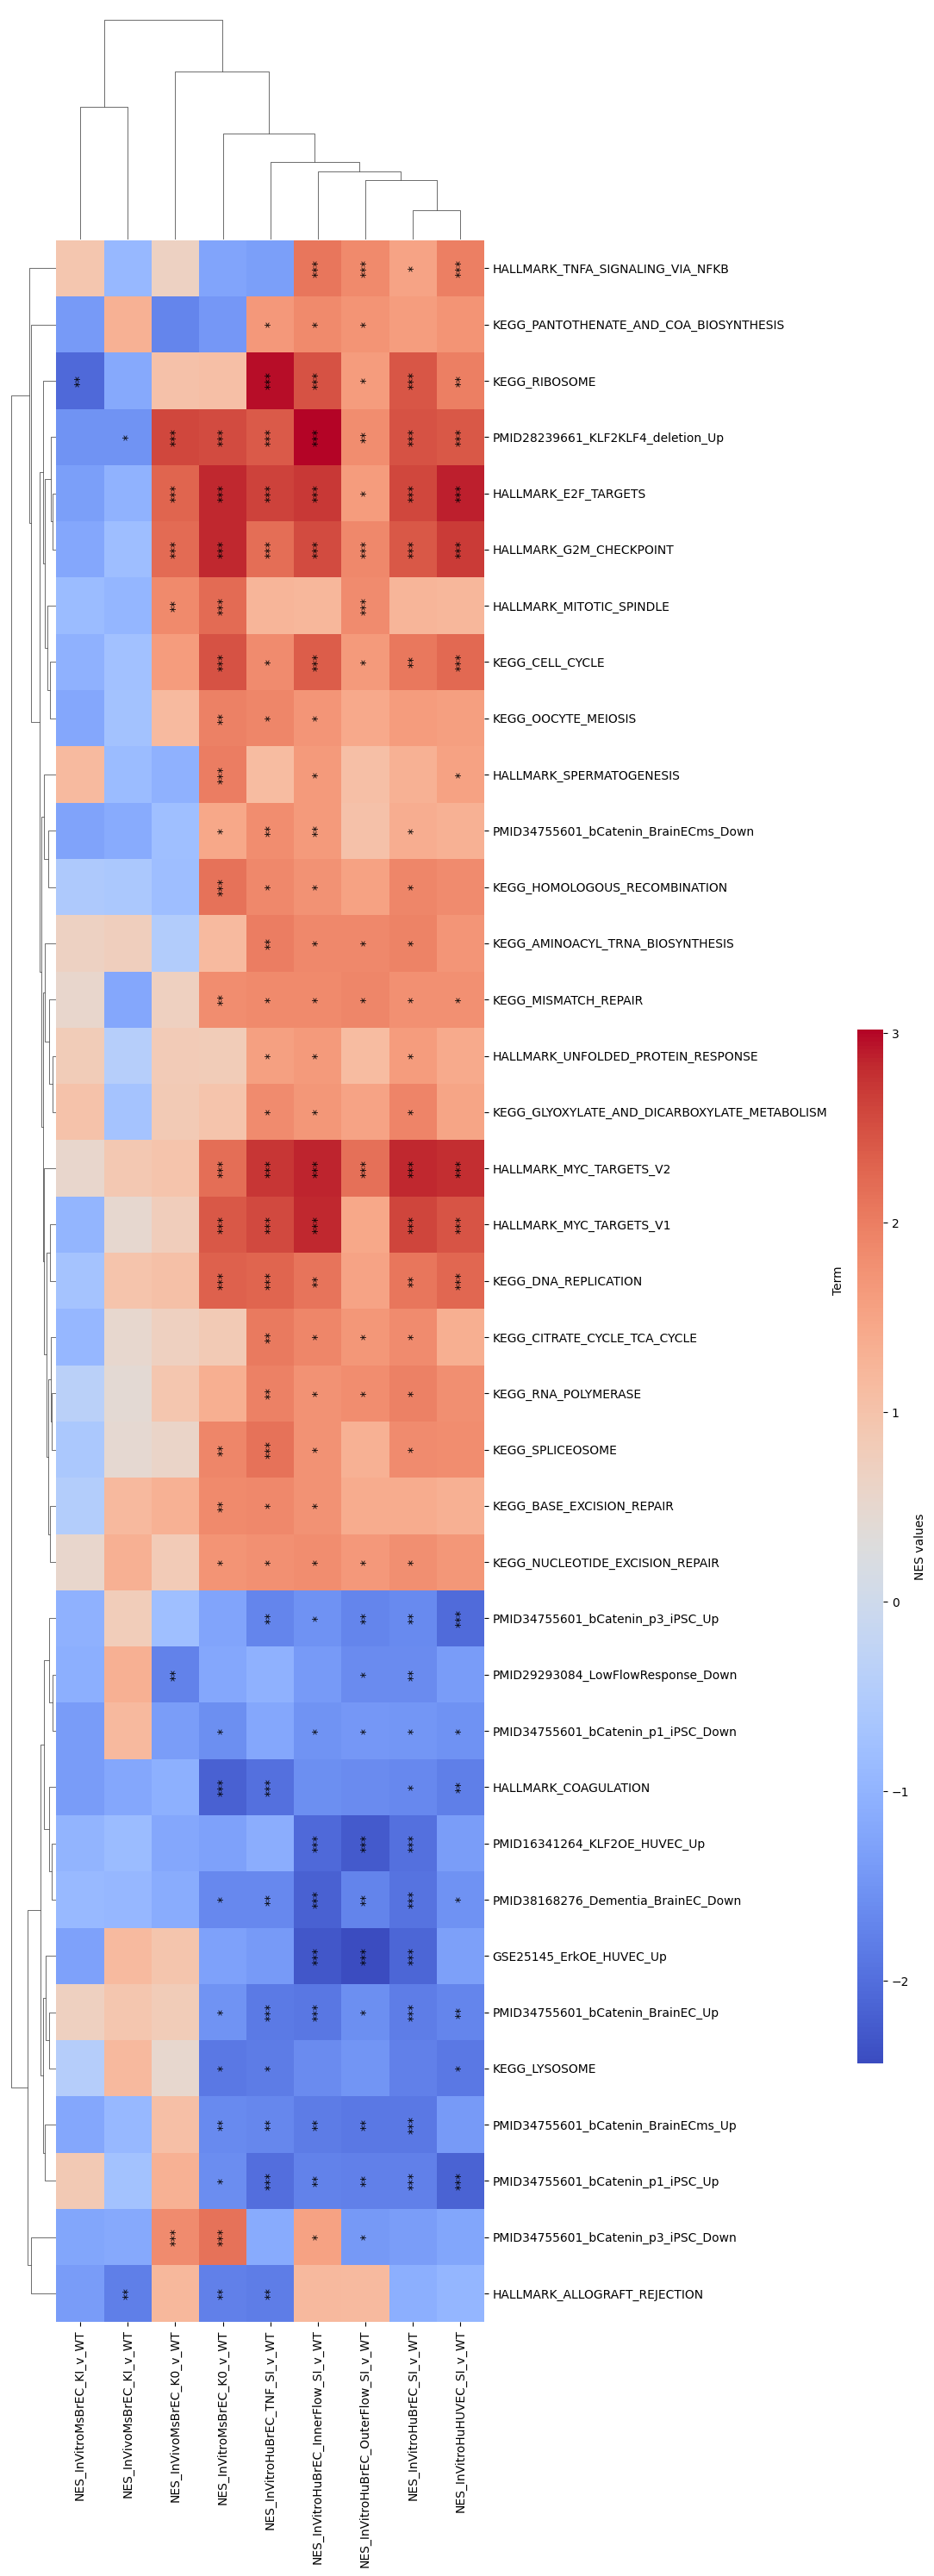

In [322]:
#This is all of the data, and used for string diagram

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 5
negative_direction_mask = negative_counts > 5

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(10, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure to a file on your desktop
file_path = f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/DataGSEA.pdf'
plt.savefig(file_path, dpi=600, format='pdf')

# Display the plot
plt.show()

# Plot overlap in terms

In [323]:
# Find the length of the longest list
max_lengthKEGG = max(len(lst) for lst in KEGG_2023_Human_Ms.values())
max_lengthHallmark = max(len(lst) for lst in MSigDB_Hallmark_2023_Ms.values())

# Pad shorter lists with NaN
for key in KEGG_2023_Human_Ms.keys():
    length_difference = max_lengthKEGG - len(KEGG_2023_Human_Ms[key])
    if length_difference > 0:
        KEGG_2023_Human_Ms[key].extend([float('nan')] * length_difference)

for key in MSigDB_Hallmark_2023_Ms.keys():
    length_difference = max_lengthHallmark - len(MSigDB_Hallmark_2023_Ms[key])
    if length_difference > 0:
        MSigDB_Hallmark_2023_Ms[key].extend([float('nan')] * length_difference)
        
# Convert dict to df
df_KEGG_2023_Human_Ms = pd.DataFrame.from_dict(KEGG_2023_Human_Ms)
df_MSigDB_Hallmark_2023_Ms = pd.DataFrame.from_dict(MSigDB_Hallmark_2023_Ms)

# Combine custom dataframes
GSEAterms_df = pd.concat([df_mouse, df_human_MmGeneID, df_KEGG_2023_Human_Ms, df_MSigDB_Hallmark_2023_Ms], axis=1)

# Get the list of index values from data_for_heatmap
index_values_to_keep = data_for_heatmap.index.tolist()

# Filter GSEAterms_df to include only columns whose names match the terms
GSEAterms_df_filtered = GSEAterms_df[GSEAterms_df.columns.intersection(index_values_to_keep)]

In [324]:
data_for_heatmap

,NES_InVitroMsBrEC_KI_v_WT,NES_InVitroHuBrEC_SI_v_WT,NES_InVitroHuBrEC_InnerFlow_SI_v_WT,NES_InVitroHuBrEC_TNF_SI_v_WT,NES_InVitroHuBrEC_OuterFlow_SI_v_WT,NES_InVitroHuHUVEC_SI_v_WT,NES_InVitroMsBrEC_K0_v_WT,NES_InVivoMsBrEC_KI_v_WT,NES_InVivoMsBrEC_K0_v_WT
Term,,,,,,,,,
PMID28239661_KLF2KLF4_deletion_Up,-1.505706,2.470419,3.020165,2.385571,1.819788,2.412169,2.543064,-1.512010,2.583034
PMID29293084_LowFlowResponse_Down,-1.088945,-1.618306,-1.411832,-1.044168,-1.619334,-1.372277,-1.215479,1.327084,-1.743902
PMID34755601_bCatenin_BrainECms_Down,-1.271068,1.378829,1.636411,1.811804,1.028627,1.300509,1.455765,-1.144091,-0.781415
PMID34755601_bCatenin_BrainECms_Up,-1.209833,-1.871073,-1.829733,-1.683051,-1.874195,-1.395975,-1.628110,-0.920790,1.080381
GSE25145_ErkOE_HUVEC_Up,-1.305749,-2.095941,-2.301706,-1.409044,-2.435473,-1.324551,-1.289501,1.151484,0.954670
PMID16341264_KLF2OE_HUVEC_Up,-0.997394,-1.977932,-2.064061,-1.113095,-2.245219,-1.349838,-1.296134,-0.848326,-1.207443
PMID34755601_bCatenin_BrainEC_Up,0.697586,-1.803907,-1.885033,-1.854226,-1.564066,-1.700804,-1.515596,0.950254,0.824938
PMID34755601_bCatenin_p1_iPSC_Down,-1.380817,-1.461347,-1.514269,-1.200616,-1.436732,-1.534402,-1.574227,1.187224,-1.365437
PMID34755601_bCatenin_p1_iPSC_Up,0.876800,-1.762931,-1.736716,-1.996763,-1.768008,-2.151082,-1.602347,-0.710478,1.294018


In [325]:
GSEAterms_df_filtered

,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up,PMID34755601_bCatenin_BrainEC_Up,PMID34755601_bCatenin_p3_iPSC_Up,PMID34755601_bCatenin_p1_iPSC_Up,PMID34755601_bCatenin_p3_iPSC_Down,PMID34755601_bCatenin_p1_iPSC_Down,GSE25145_ErkOE_HUVEC_Up,PMID16341264_KLF2OE_HUVEC_Up,PMID38168276_Dementia_BrainEC_Down,KEGG_AMINOACYL_TRNA_BIOSYNTHESIS,KEGG_BASE_EXCISION_REPAIR,KEGG_CELL_CYCLE,KEGG_CITRATE_CYCLE_TCA_CYCLE,KEGG_DNA_REPLICATION,KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM,KEGG_HOMOLOGOUS_RECOMBINATION,KEGG_LYSOSOME,KEGG_MISMATCH_REPAIR,KEGG_NUCLEOTIDE_EXCISION_REPAIR,KEGG_OOCYTE_MEIOSIS,KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS,KEGG_RIBOSOME,KEGG_RNA_POLYMERASE,KEGG_SPLICEOSOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_COAGULATION,HALLMARK_E2F_TARGETS,HALLMARK_G2M_CHECKPOINT,HALLMARK_MITOTIC_SPINDLE,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V2,HALLMARK_SPERMATOGENESIS,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_UNFOLDED_PROTEIN_RESPONSE
0,Serpina1b,Cxcl3,Raet1b,Esr1,Abcc6,Apcdd1,Prnd,Col1a1,Il1rl1,Igfbp5,Trh,Slco1a4,Aars1,Apex1,Abl1,Acly,Dna2,Aco1,Blm,Abca2,Exo1,Ccnh,Adcy1,Bcat1,Fau,Polr1a,Acin1,Aars1,A2m,Ak2,Abl1,Abi1,Abce1,Aimp2,Ace,Abca1,Aldh18a1
1,Klk10,Slc26a9,Crhbp,Grin2a,Slco1c1,Dkk2,Aplnr,Col1a2,Chpf,Cmklr1,Crabp2,Spock3,Aars2,Apex2,Anapc1,Aco1,Fen1,Aco2,Brca2,Abcb9,Lig1,Cdk7,Adcy2,Bcat2,Mrpl13,Polr1b,Gm4312,Abce1,Acox2,Anp32e,Amd2,Abl1,Acp1,Bysl,Acrbp,Ackr3,Arfgap1
2,Cidea,Tmem212,BC018473,Cdkn2a,Sobp,Lpl,Nts,Thy1,Lox,DARC,C11orf9,Ablim1,Cars1,Fen1,Anapc10,Aco2,Lig1,Afmid,Eme1,Acp2,Mlh1,,Adcy3,Coasy,Rpl10-ps3,Polr1c,Aqr,Abi1,,Asf1a,Arid4a,Abr,Aimp2,,Acrv1,Areg,Asns
3,Cox8b,Gm15340,Gm6654,Fosb,Fgfbp1,Pcsk2,Apcdd1,Igfbp5,WISP1,Adamts1,Hba-a2,Abcg3,Cars2,,Anapc11,Cs,Mcm2,Cs,Mre11a,Acp5,Mlh3,Cul4a,Adcy4,Dpyd,,Polr1d,Bcas2,Ache,Ang2,Asf1b,Atf5,Actn4,Ap3s1,Cdk4,Actl7b,Atf3,Atf3
4,Cyp2b10,Gkn1,Lars2,Gm4841,Camk2b,Lsr,,Mme,Tmem100,Klk10,Ckb,Plppr4,Dars1,,Anapc13,Dlat,Mcm3,Glyctk,Mus81,Aga,Msh2,Cul4b,Adcy5,Dpys,Rpl10l,Polr1e,Bud31,Acvr2a,Anxa1,,Atrx,Akap13,Apex1,Dctpp1,Adad1,Atp2b1,Atf4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"PMID29293084_LowFlowResponse_Down": "None",
"PMID28239661_KLF2KLF4_deletion_Up": "None",
"PMID34755601_bCatenin_BrainECms_Down": "None",
"PMID34755601_bCatenin_BrainECms_Up": "None",
"PMID34755601_bCatenin_BrainEC_Up": "None",
"PMID34755601_bCatenin_p3_iPSC_Up": "None",
"PMID34755601_bCatenin_p1_iPSC_Up": "None",
"PMID34755601_bCatenin_p3_iPSC_Down": "None",
"PMID34755601_bCatenin_p1_iPSC_Down": "None",
"GSE25145_ErkOE_HUVEC_Up": "None",
"PMID16341264_KLF2OE_HUVEC_Up": "None",
"PMID38168276_Dementia_BrainEC_Down": "None",
"KEGG_AMINOACYL_TRNA_BIOSYNTHESIS": "None",
"KEGG_BASE_EXCISION_REPAIR": "None",
"KEGG_CELL_CYCLE": "None",
"KEGG_CITRATE_CYCLE_TCA_CYCLE": "None",
"KEGG_DNA_REPLICATION": "None",
"KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM": "None",
"KEGG_HOMOLOGOUS_RECOMBINATION": "None",
"KEGG_LYSOSOME": "None",
"KEGG_MISMATCH_REPAIR": "None",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "None",
"KEGG_OOCYTE_MEIOSIS": "None",
"KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS": "None",
"KEGG_RIBOSOM

In [327]:
# Create a dictionary to map old column names to new column names
column_mapping = {"PMID29293084_LowFlowResponse_Down": "PMID29293084_LowFlowResponse_Down",
"PMID28239661_KLF2KLF4_deletion_Up": "PMID28239661_KLF2KLF4_deletion_Up",
"PMID34755601_bCatenin_BrainECms_Down": "PMID34755601_bCatenin_BrainECms_Down",
"PMID34755601_bCatenin_BrainECms_Up": "PMID34755601_bCatenin_BrainECms_Up",
"PMID34755601_bCatenin_BrainEC_Up": "PMID34755601_bCatenin_BrainEC_Up",
"PMID34755601_bCatenin_p3_iPSC_Up": "PMID34755601_bCatenin_p3_iPSC_Up",
"PMID34755601_bCatenin_p1_iPSC_Up": "PMID34755601_bCatenin_p1_iPSC_Up",
"PMID34755601_bCatenin_p3_iPSC_Down": "PMID34755601_bCatenin_p3_iPSC_Down",
"PMID34755601_bCatenin_p1_iPSC_Down": "PMID34755601_bCatenin_p1_iPSC_Down",
"GSE25145_ErkOE_HUVEC_Up": "GSE25145_ErkOE_HUVEC_Up",
"PMID16341264_KLF2OE_HUVEC_Up": "PMID16341264_KLF2OE_HUVEC_Up",
"PMID38168276_Dementia_BrainEC_Down": "PMID38168276_Dementia_BrainEC_Down",
"KEGG_AMINOACYL_TRNA_BIOSYNTHESIS": "KEGG_AMINOACYL_TRNA_BIOSYNTHESIS",
"KEGG_BASE_EXCISION_REPAIR": "KEGG_BASE_EXCISION_REPAIR",
"KEGG_CELL_CYCLE": "KEGG_CELL_CYCLE",
"KEGG_CITRATE_CYCLE_TCA_CYCLE": "KEGG_CITRATE_CYCLE_TCA_CYCLE",
"KEGG_DNA_REPLICATION": "KEGG_DNA_REPLICATION",
"KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM": "KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM",
"KEGG_HOMOLOGOUS_RECOMBINATION": "KEGG_HOMOLOGOUS_RECOMBINATION",
"KEGG_LYSOSOME": "KEGG_LYSOSOME",
"KEGG_MISMATCH_REPAIR": "KEGG_MISMATCH_REPAIR",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "KEGG_NUCLEOTIDE_EXCISION_REPAIR",
"KEGG_OOCYTE_MEIOSIS": "KEGG_OOCYTE_MEIOSIS",
"KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS": "KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS",
"KEGG_RIBOSOME": "KEGG_RIBOSOME",
"KEGG_RNA_POLYMERASE": "KEGG_RNA_POLYMERASE",
"KEGG_SPLICEOSOME": "KEGG_SPLICEOSOME",
"HALLMARK_ALLOGRAFT_REJECTION": "HALLMARK_ALLOGRAFT_REJECTION",
"HALLMARK_COAGULATION": "HALLMARK_COAGULATION",
"HALLMARK_E2F_TARGETS": "HALLMARK_E2F_TARGETS",
"HALLMARK_G2M_CHECKPOINT": "HALLMARK_G2M_CHECKPOINT",
"HALLMARK_MITOTIC_SPINDLE": "HALLMARK_MITOTIC_SPINDLE",
"HALLMARK_MYC_TARGETS_V1": "HALLMARK_MYC_TARGETS_V1",
"HALLMARK_MYC_TARGETS_V2": "HALLMARK_MYC_TARGETS_V2",
"HALLMARK_SPERMATOGENESIS": "HALLMARK_SPERMATOGENESIS",
"HALLMARK_TNFA_SIGNALING_VIA_NFKB": "HALLMARK_TNFA_SIGNALING_VIA_NFKB",
"HALLMARK_UNFOLDED_PROTEIN_RESPONSE": "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"}

# Create a copy of GSEAterms_df_filtered
GSEAterms_df_filtered_copy = GSEAterms_df_filtered.copy()

# Use the rename method to replace column names in the copy
GSEAterms_df_filtered_copy.rename(columns=column_mapping, inplace=True)

In [328]:
GSEAterms_df_filtered_copy

,PMID29293084_LowFlowResponse_Down,PMID28239661_KLF2KLF4_deletion_Up,PMID34755601_bCatenin_BrainECms_Down,PMID34755601_bCatenin_BrainECms_Up,PMID34755601_bCatenin_BrainEC_Up,PMID34755601_bCatenin_p3_iPSC_Up,PMID34755601_bCatenin_p1_iPSC_Up,PMID34755601_bCatenin_p3_iPSC_Down,PMID34755601_bCatenin_p1_iPSC_Down,GSE25145_ErkOE_HUVEC_Up,PMID16341264_KLF2OE_HUVEC_Up,PMID38168276_Dementia_BrainEC_Down,KEGG_AMINOACYL_TRNA_BIOSYNTHESIS,KEGG_BASE_EXCISION_REPAIR,KEGG_CELL_CYCLE,KEGG_CITRATE_CYCLE_TCA_CYCLE,KEGG_DNA_REPLICATION,KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM,KEGG_HOMOLOGOUS_RECOMBINATION,KEGG_LYSOSOME,KEGG_MISMATCH_REPAIR,KEGG_NUCLEOTIDE_EXCISION_REPAIR,KEGG_OOCYTE_MEIOSIS,KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS,KEGG_RIBOSOME,KEGG_RNA_POLYMERASE,KEGG_SPLICEOSOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_COAGULATION,HALLMARK_E2F_TARGETS,HALLMARK_G2M_CHECKPOINT,HALLMARK_MITOTIC_SPINDLE,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V2,HALLMARK_SPERMATOGENESIS,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_UNFOLDED_PROTEIN_RESPONSE
0,Serpina1b,Cxcl3,Raet1b,Esr1,Abcc6,Apcdd1,Prnd,Col1a1,Il1rl1,Igfbp5,Trh,Slco1a4,Aars1,Apex1,Abl1,Acly,Dna2,Aco1,Blm,Abca2,Exo1,Ccnh,Adcy1,Bcat1,Fau,Polr1a,Acin1,Aars1,A2m,Ak2,Abl1,Abi1,Abce1,Aimp2,Ace,Abca1,Aldh18a1
1,Klk10,Slc26a9,Crhbp,Grin2a,Slco1c1,Dkk2,Aplnr,Col1a2,Chpf,Cmklr1,Crabp2,Spock3,Aars2,Apex2,Anapc1,Aco1,Fen1,Aco2,Brca2,Abcb9,Lig1,Cdk7,Adcy2,Bcat2,Mrpl13,Polr1b,Gm4312,Abce1,Acox2,Anp32e,Amd2,Abl1,Acp1,Bysl,Acrbp,Ackr3,Arfgap1
2,Cidea,Tmem212,BC018473,Cdkn2a,Sobp,Lpl,Nts,Thy1,Lox,DARC,C11orf9,Ablim1,Cars1,Fen1,Anapc10,Aco2,Lig1,Afmid,Eme1,Acp2,Mlh1,,Adcy3,Coasy,Rpl10-ps3,Polr1c,Aqr,Abi1,,Asf1a,Arid4a,Abr,Aimp2,,Acrv1,Areg,Asns
3,Cox8b,Gm15340,Gm6654,Fosb,Fgfbp1,Pcsk2,Apcdd1,Igfbp5,WISP1,Adamts1,Hba-a2,Abcg3,Cars2,,Anapc11,Cs,Mcm2,Cs,Mre11a,Acp5,Mlh3,Cul4a,Adcy4,Dpyd,,Polr1d,Bcas2,Ache,Ang2,Asf1b,Atf5,Actn4,Ap3s1,Cdk4,Actl7b,Atf3,Atf3
4,Cyp2b10,Gkn1,Lars2,Gm4841,Camk2b,Lsr,,Mme,Tmem100,Klk10,Ckb,Plppr4,Dars1,,Anapc13,Dlat,Mcm3,Glyctk,Mus81,Aga,Msh2,Cul4b,Adcy5,Dpys,Rpl10l,Polr1e,Bud31,Acvr2a,Anxa1,,Atrx,Akap13,Apex1,Dctpp1,Adad1,Atp2b1,Atf4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
# Check for duplicate column names
duplicate_columns = GSEAterms_df_filtered.columns[GSEAterms_df_filtered.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


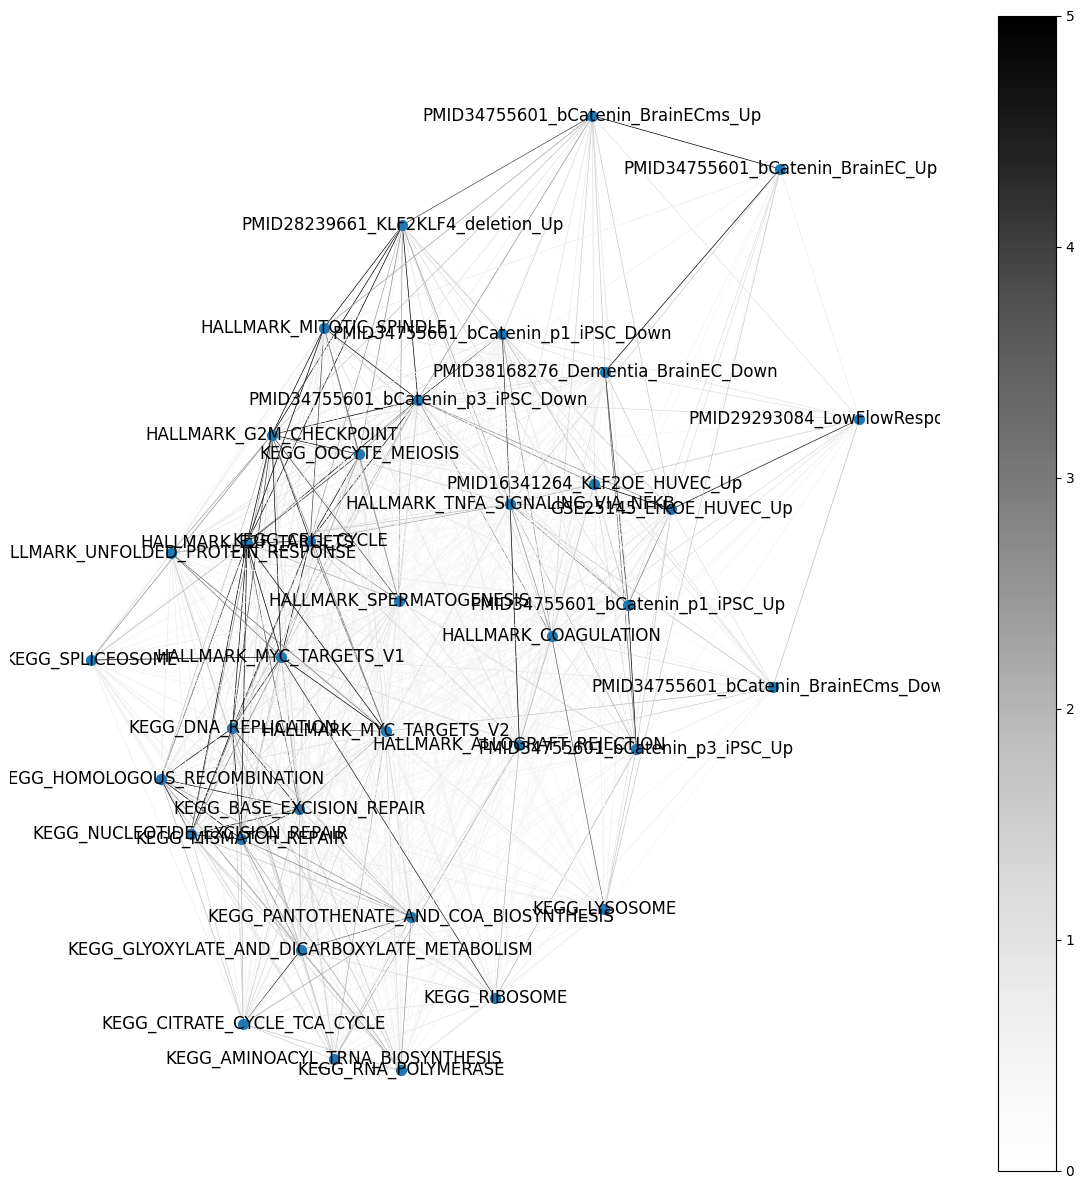

In [330]:
# Create a dictionary to store the mapping between node numbers and term names
node_names = {i: termgsea for i, termgsea in enumerate(GSEAterms_df_filtered_copy.columns)}

G = nx.Graph()

# Add nodes to the graph with numbering and store the mapping
for node, termgsea in node_names.items():
    G.add_node(node, label=termgsea)  # Add node with number and term label

    
# Add edges to the graph based on gene similarities
for i, term1 in enumerate(GSEAterms_df_filtered_copy.columns):
    for j, term2 in enumerate(GSEAterms_df_filtered_copy.columns):
        if i < j:  # Avoid self-loop and redundant connections
            genes1 = set(GSEAterms_df_filtered_copy[term1].dropna())
            genes2 = set(GSEAterms_df_filtered_copy[term2].dropna())
            common_genes = genes1.intersection(genes2)
            total_genes = genes1.union(genes2)
            num_total_genes = len(total_genes)
            num_common_genes = len(common_genes)
            if num_total_genes > 0:  # Avoid division by zero
                percent_overlap = (num_common_genes / num_total_genes) * 100
                if percent_overlap > 0:
                    G.add_edge(i, j, weight=percent_overlap, width=percent_overlap)

    
# Remove isolated nodes (those not connected to any other node)
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

for node in list(G.nodes()):
    if G.degree(node) <= 1:
        G.remove_node(node)

# After modifying the graph (adding/removing nodes and edges)
pos = nx.spring_layout(G)  # Recalculate positions for the updated graph

# Update node_labels only for nodes present in the updated graph
node_labels = {node: node_names[node] for node in G.nodes()}
        
# Now you can draw the graph
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Extracting weights from the graph for edge colors
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize the weights to a fixed range between 0 and 100 for coloring
norm = mcolors.Normalize(vmin=0, vmax=5)  # set fixed scale here

# Choose a colormap
cmap = plt.cm.Greys  # using Greys colormap for black and grey color scale

# Draw the graph with term labels
node_labels = {node: label for node, label in node_names.items()}
nx.draw(G, pos, labels=node_labels, with_labels=True,
        font_size=12,  # Adjust font size as needed
        edge_color=[cmap(norm(w)) for w in weights],
        width=0.5,  # Fixed thin width
        node_size=50,  # Adjust node size as needed
        ax=ax)

# Optionally, you can add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)

# Save the figure to a file on your desktop
file_path = f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/Networkx_DataGSEA.pdf'
plt.savefig(file_path, dpi=600, format='pdf')

# Display the plot
plt.show()

In [331]:
node_labels

{0: 'PMID29293084_LowFlowResponse_Down',
 1: 'PMID28239661_KLF2KLF4_deletion_Up',
 2: 'PMID34755601_bCatenin_BrainECms_Down',
 3: 'PMID34755601_bCatenin_BrainECms_Up',
 4: 'PMID34755601_bCatenin_BrainEC_Up',
 5: 'PMID34755601_bCatenin_p3_iPSC_Up',
 6: 'PMID34755601_bCatenin_p1_iPSC_Up',
 7: 'PMID34755601_bCatenin_p3_iPSC_Down',
 8: 'PMID34755601_bCatenin_p1_iPSC_Down',
 9: 'GSE25145_ErkOE_HUVEC_Up',
 10: 'PMID16341264_KLF2OE_HUVEC_Up',
 11: 'PMID38168276_Dementia_BrainEC_Down',
 12: 'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
 13: 'KEGG_BASE_EXCISION_REPAIR',
 14: 'KEGG_CELL_CYCLE',
 15: 'KEGG_CITRATE_CYCLE_TCA_CYCLE',
 16: 'KEGG_DNA_REPLICATION',
 17: 'KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM',
 18: 'KEGG_HOMOLOGOUS_RECOMBINATION',
 19: 'KEGG_LYSOSOME',
 20: 'KEGG_MISMATCH_REPAIR',
 21: 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 22: 'KEGG_OOCYTE_MEIOSIS',
 23: 'KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS',
 24: 'KEGG_RIBOSOME',
 25: 'KEGG_RNA_POLYMERASE',
 26: 'KEGG_SPLICEOSOME',
 27: 'HALLMARK_ALLOG

# Show individual GSEA plots

In [332]:
###NOTE to plot GSEA terms, need to use the correct results (from merging above)

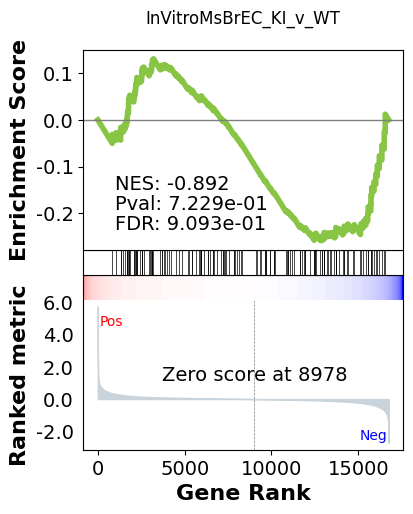

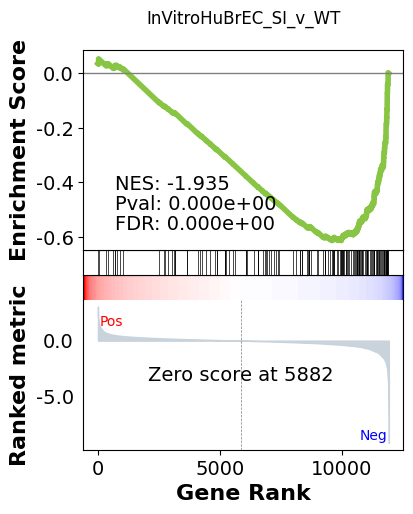

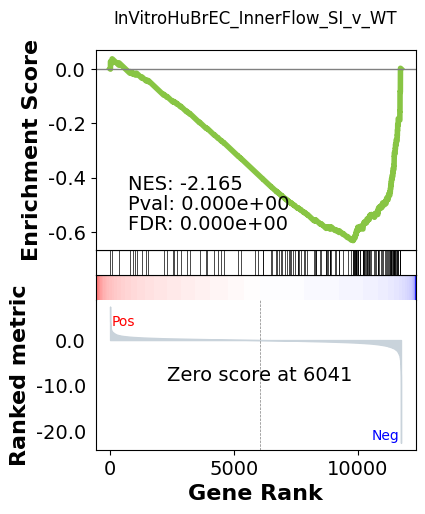

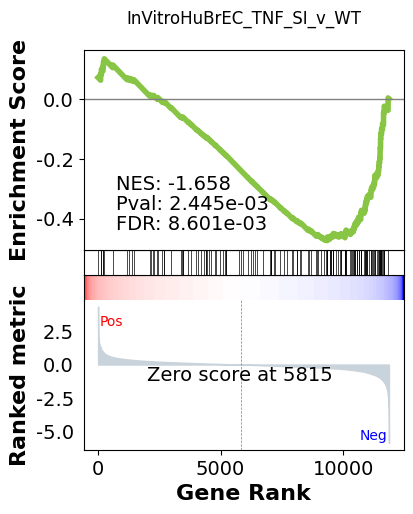

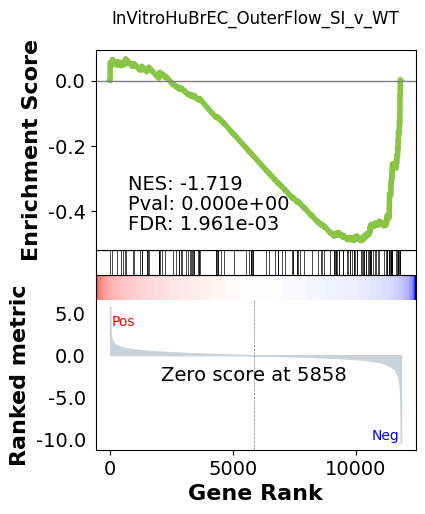

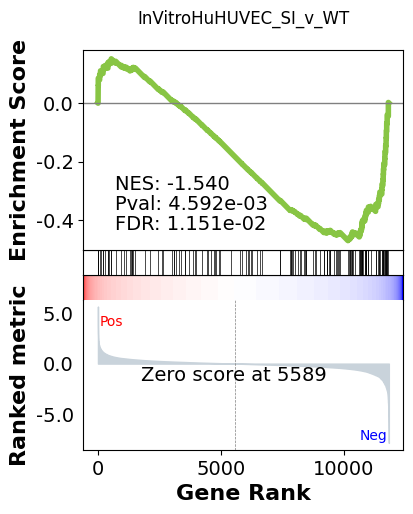

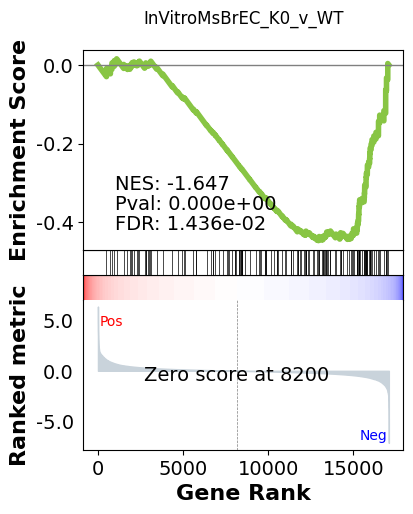

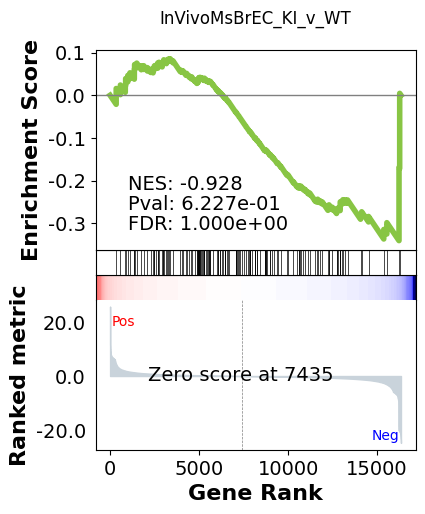

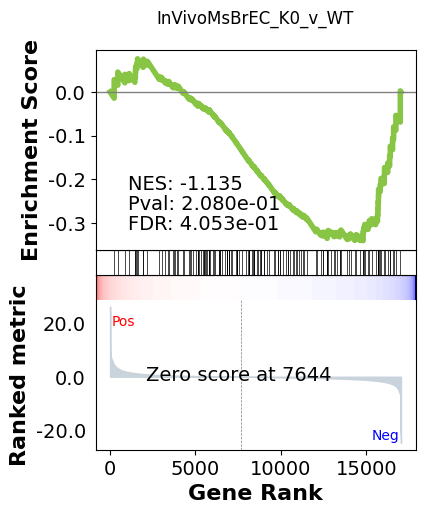

In [333]:
term_search = 'PMID38168276_Dementia_BrainEC_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

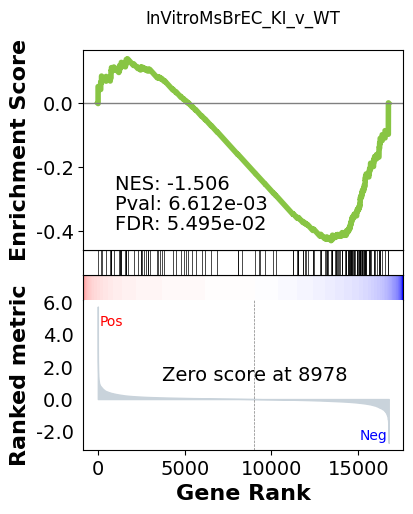

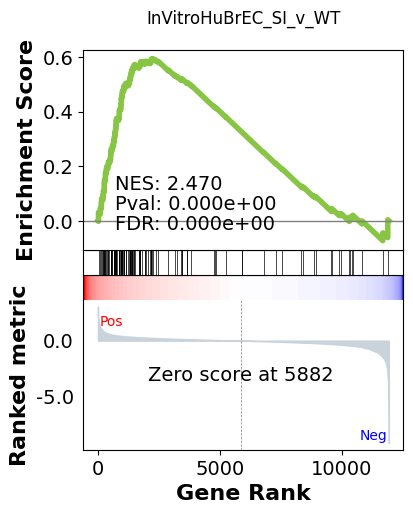

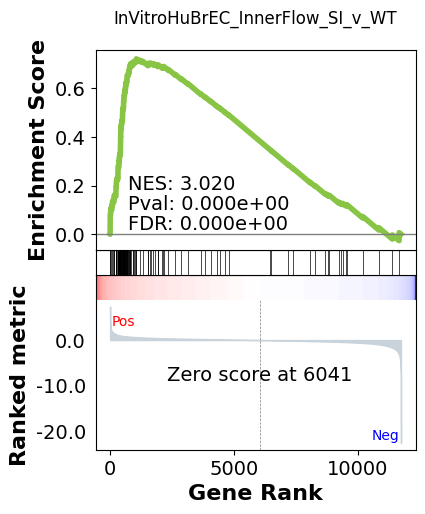

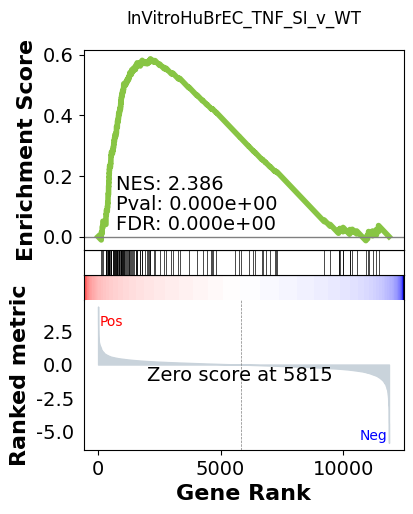

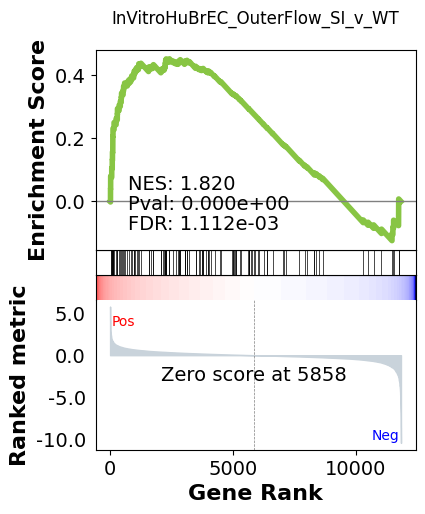

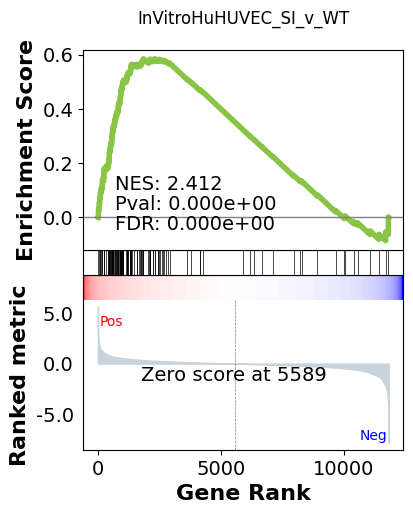

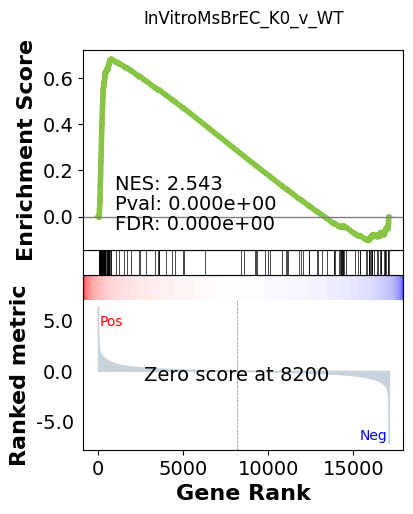

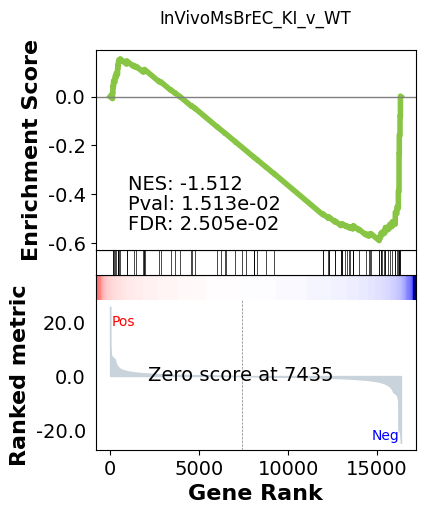

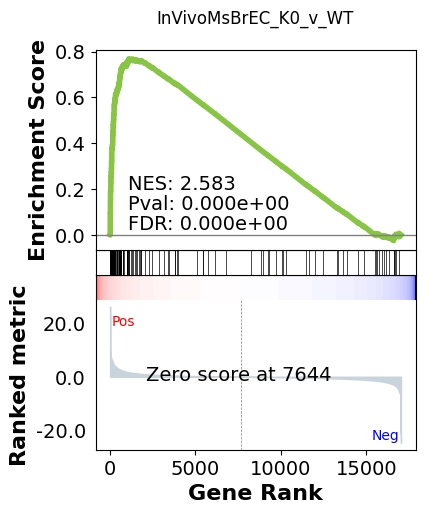

In [334]:
term_search = 'PMID28239661_KLF2KLF4_deletion_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

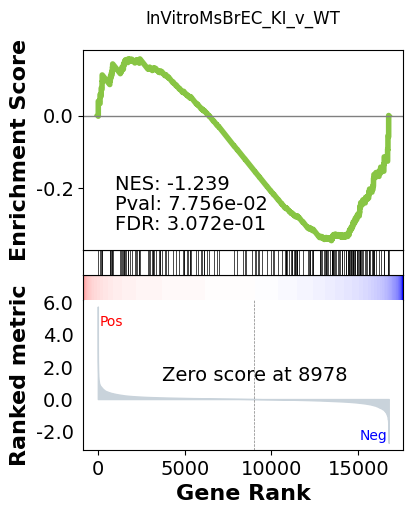

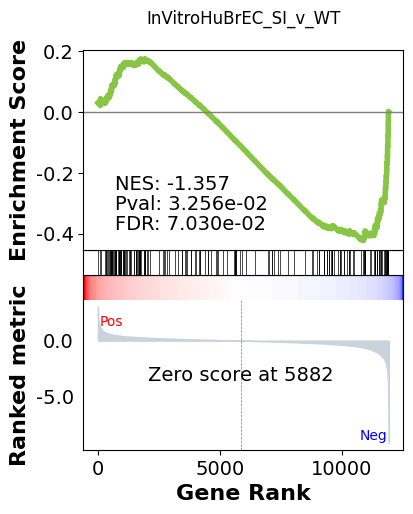

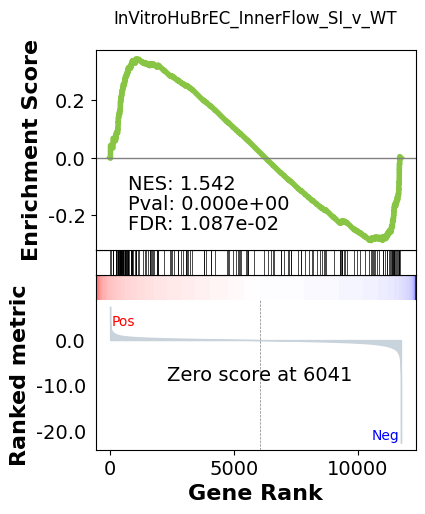

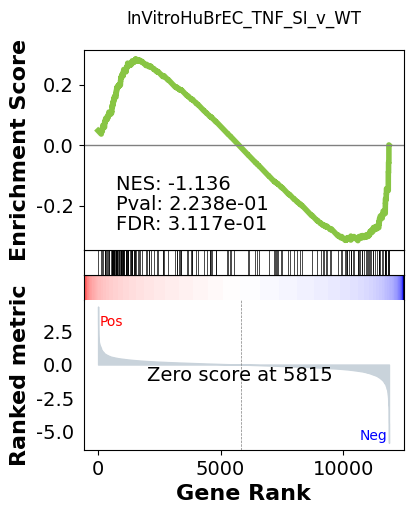

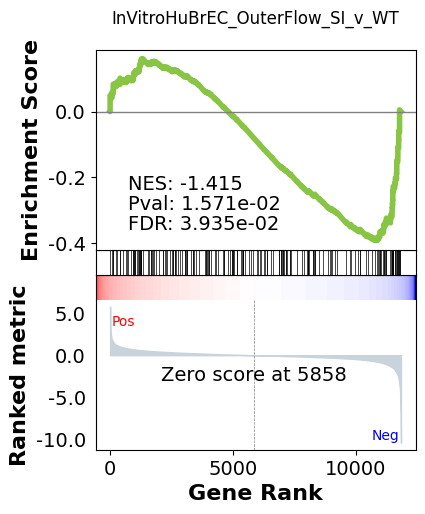

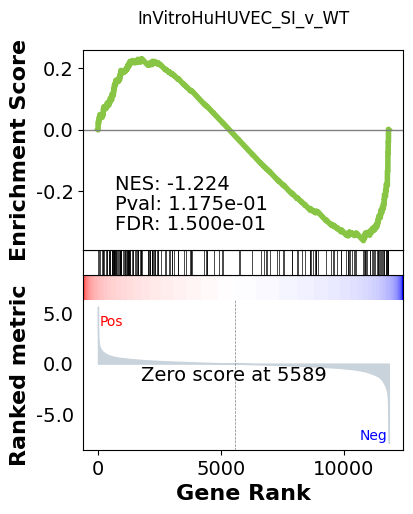

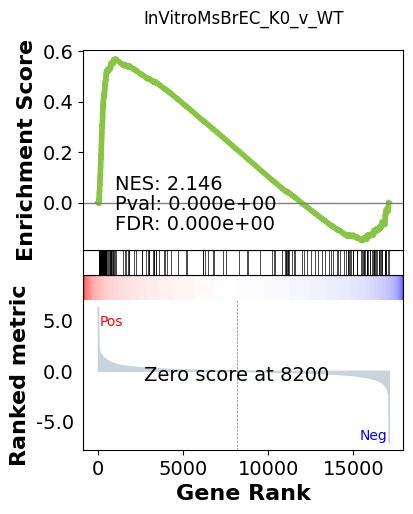

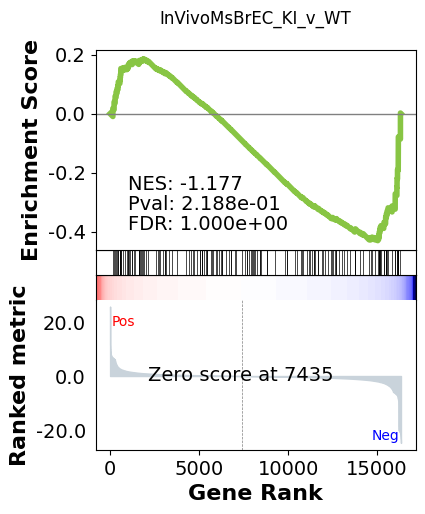

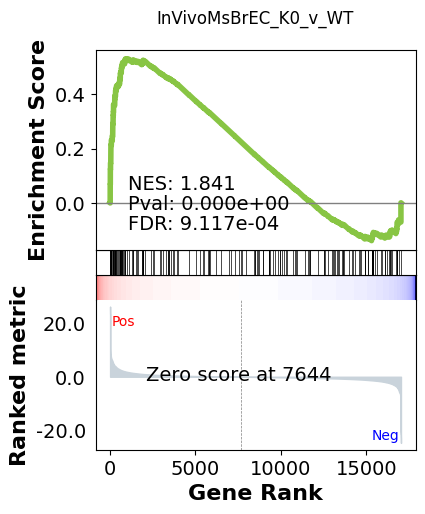

In [335]:
term_search = 'PMID34755601_bCatenin_p3_iPSC_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

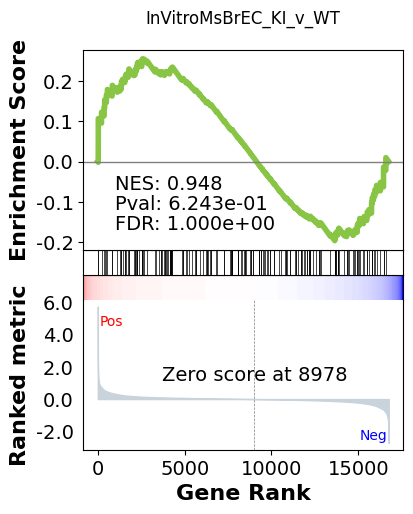

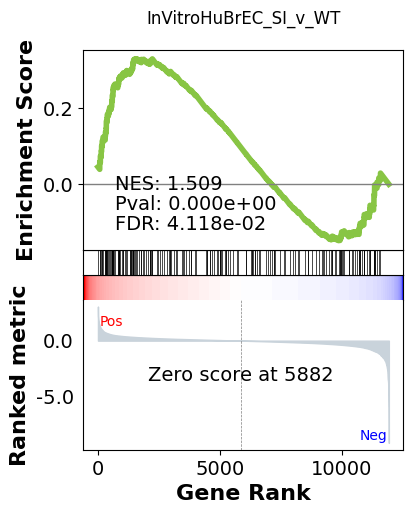

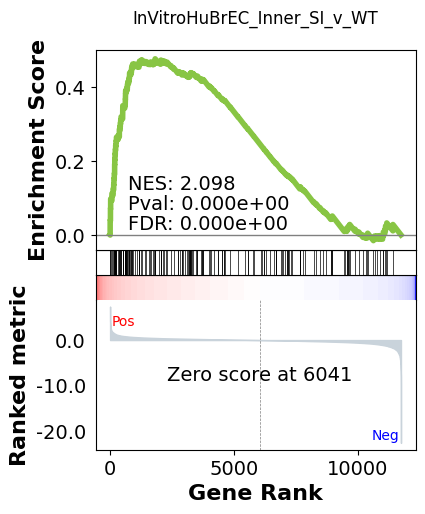

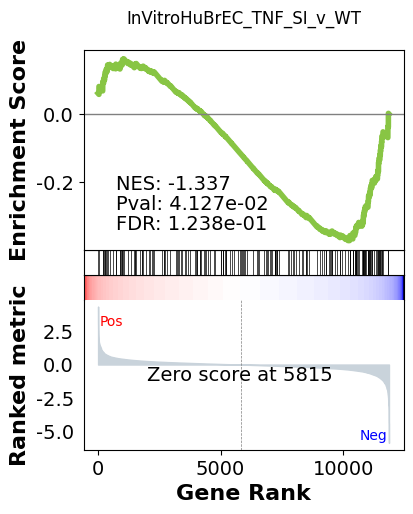

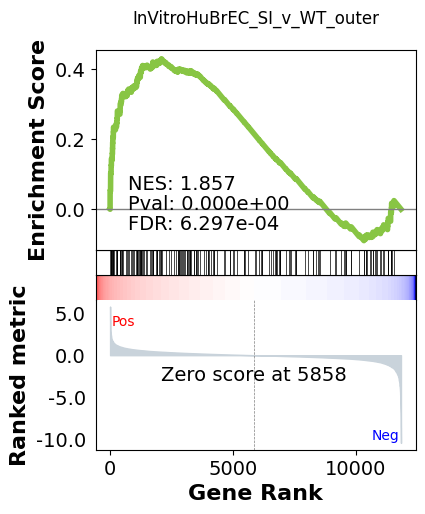

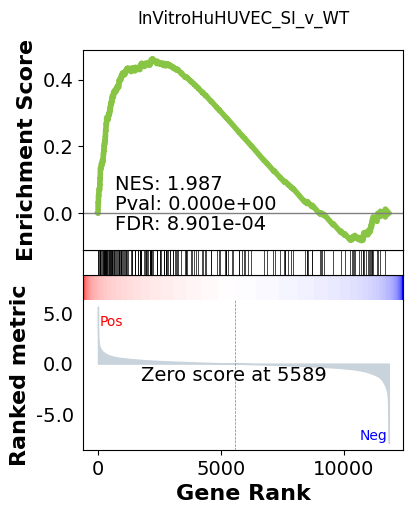

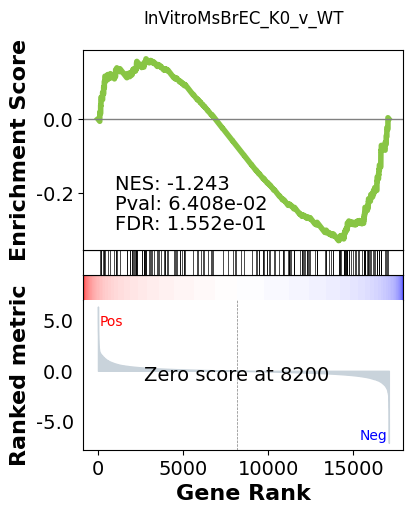

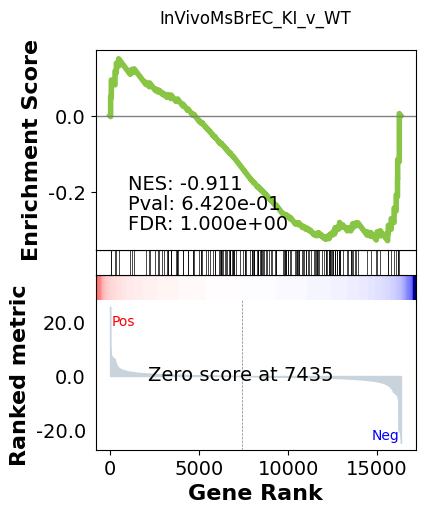

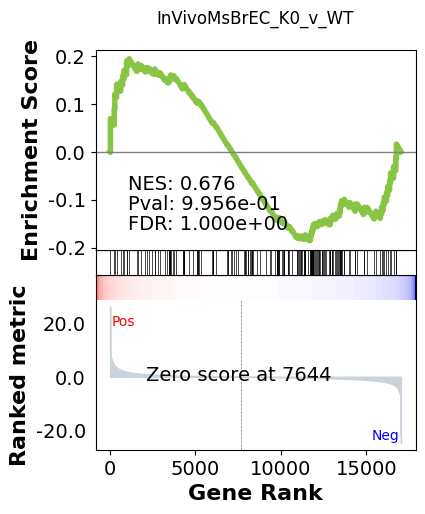

In [305]:
term_search = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_hallmark.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

# Plot genes in term between datasets

In [340]:
#Prepare single cell res file so that it is in the same format as others

def reformat_df(combined_df):
    # Create a copy of the DataFrame
    formatted_df = combined_df.copy()

    # Print original columns for debugging
    print("Original columns:", formatted_df.columns.tolist())

    # If DataFrame has a column to be set as index, set it as index
    if '1_names' in formatted_df.columns:
        formatted_df.set_index('1_names', inplace=True)
    
    # Rename columns
    formatted_df.columns = formatted_df.columns.str.replace('1_logfoldchanges', 'log2FoldChange')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals_adj', 'padj')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals', 'pvalue')

    # Print new columns for debugging
    print("New columns:", formatted_df.columns.tolist())
    
    return formatted_df

def reformat_and_assign(df_name, df):
    reformatted_df = reformat_df(df)
    globals()[df_name + '_formatted'] = reformatted_df

# Example usage
reformat_and_assign('InVivoNuclei_Clust1v3_res', InVivoNuclei_Clust1v3_res)

Original columns: ['Unnamed: 0', '1_names', '1_scores', '1_logfoldchanges', '1_pvals_adj', '1_pvals']
New columns: ['Unnamed: 0', '1_scores', 'log2FoldChange', 'padj', 'pvalue']


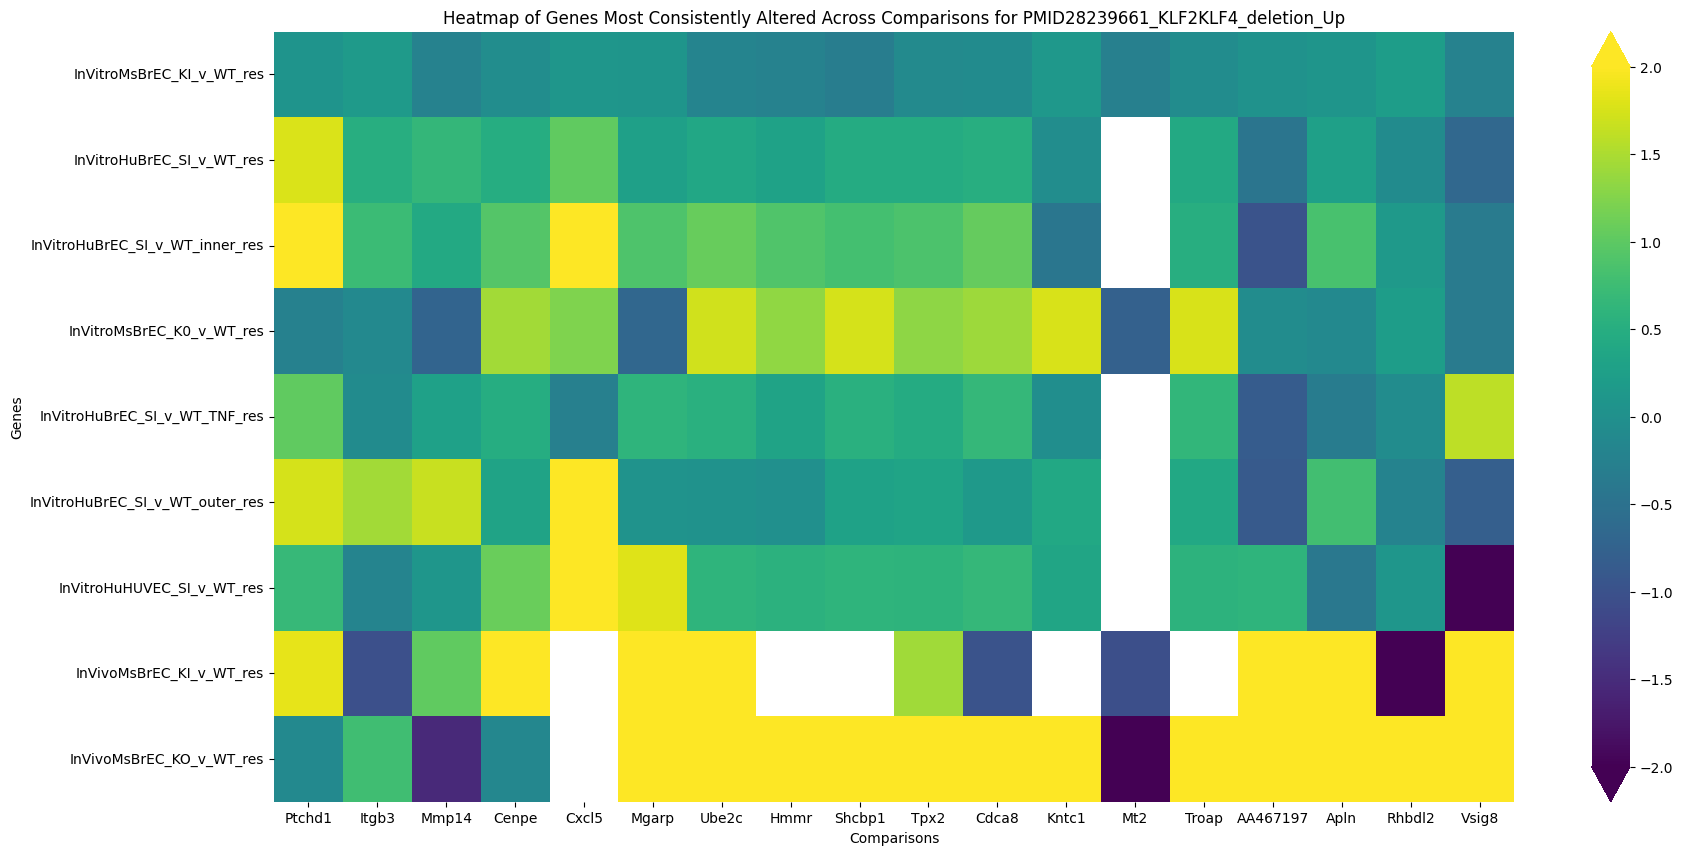

In [344]:
#Use this for human custom genesets, ms converted or ms geneset

#Geneset options
#custom_endo_hum_MsID_genesets
#custom_endo_mus_genesets

# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
#    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
#    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res_MsGeneID,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res' : InVitroHuBrEC_Inner_siTDP43vWT_res_MsGeneID,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_SI_v_WT_TNF_res' : InVitroHuBrEC_TNF_siTDP43vWT_res_MsGeneID,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res_MsGeneID,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res_MsGeneID,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
#    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res,
#    'InVivoNuclei_Clust1v3_res_formatted': InVivoNuclei_Clust1v3_res_formatted
}

# To extract a specific gene set
gene_set_name = "PMID28239661_KLF2KLF4_deletion_Up" #Replace with your actual gene set name
gsea_term_genes = custom_endo_mus_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

# Step 1: Count the occurrences of significant p-values for each gene
significant_count = Counter()

for df in df_dict_humangene_res.values():
    significant_genes = df[(df['padj'] < 0.05) & df.index.isin(gsea_term_genes_list)].index
    significant_count.update(significant_genes)

# Filter genes based on significance count
filtered_genes = [gene for gene, count in significant_count.items() if count >= 1]

# Initialize a DataFrame to hold the log2FoldChange for the filtered genes in each DataFrame
combined_df = pd.DataFrame(index=filtered_genes)

for df_name, df in df_dict_humangene_res.items():
    # Drop duplicates in the index (gene names)
    df = df[~df.index.duplicated(keep='first')]

    # Filter the DataFrame for genes in the filtered_genes list
    filtered_df = df[df.index.isin(filtered_genes)]
    
    # Add the log2FoldChange values of the filtered_df to the combined_df
    combined_df[df_name] = filtered_df['log2FoldChange']

# Transpose the DataFrame to have comparisons as columns and genes as rows
combined_df = combined_df.T


# Create the Heatmap with the custom colormap
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, annot=False, cmap='viridis', vmin=-2, vmax=2, cbar_kws={'extend': 'both'})
plt.title(f'Heatmap of Genes Most Consistently Altered Across Comparisons for {gene_set_name}')
plt.xlabel('Comparisons')
plt.ylabel('Genes')

# Save the figure to a file on your desktop
file_path = f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{gene_set_name}_topterms.pdf'
plt.savefig(file_path, dpi=600, format='pdf')

# Display the plot
plt.show()